# Comparação de Performance: Prim x Kruskal

In [4]:
import grafos
import networkx as nx
import time
import heapq

from matplotlib import pyplot as plt

### Implementação dos algoritmos de Prim e de Kruskal

In [24]:
def prim_base(graph: nx.Graph, root):
    """Implementa o algoritmo de Prim."""
    result = nx.Graph()
    possible_edges = list(graph.edges(root, data=True))
    
    for _ in range(0, graph.order()-1):
        edge = min(possible_edges, key=lambda x: x[2]["weight"])
        u, v, d = edge
        w = d["weight"]
        
        result.add_edge(u, v, weight=w)
        new_possible_edges = list(graph.edges(v, data=True))
        possible_edges.extend(new_possible_edges)
        possible_edges.remove(edge)
        possible_edges = [edge for edge in possible_edges if edge[1] not in result]
        
    return result
        

In [30]:
def prim_with_heap(graph: nx.Graph, root):
    """Implementa o algoritmo de Prim."""
    result = nx.Graph()
    possible_edges = list(graph.edges(root, data=True))
    heapq.heapify(possible_edges)
    
    e = 0
    while e < graph.order()-1:
        edge = heapq.heappop(possible_edges)
        u, v, d = edge
        w = d["weight"]
        
        if v in result:
            continue
        
        result.add_edge(u, v, weight=w)
        new_possible_edges = list(graph.edges(v, data=True))
        for edge in new_possible_edges:
            heapq.heappush(possible_edges, edge)
        e += 1
        
    return result

In [26]:
def kruskal(graph: nx.Graph):
    """Implementa o algoritmo de Kruskal."""
    result = nx.Graph()
    parents = [node for node in graph.nodes()]
    sorted_edges = sorted(graph.edges(data=True), key=lambda x: x[2]["weight"])
    
    e = 0
    for u, v, d in sorted_edges:
        w = d["weight"]
        
        u_root = find(u, parents)
        v_root = find(v, parents)
        
        if u_root != v_root:
            result.add_edge(u, v, weight=w)
            union(u, v, parents)
            e += 1
            
        if e > graph.order():
            break
        
    return result


def find(node, parents):
    if parents[node] == node:
        return node
    else:
        result = find(parents[node], parents)
        parents[node] = result
        return result


def union(u, v, parents):
    u_root = find(u, parents)
    v_root = find(v, parents)
    parents[u_root] = v_root

### Testando os algoritmos

A implementação do algoritmo de criação do grafo pode ser verificada em grafos.py

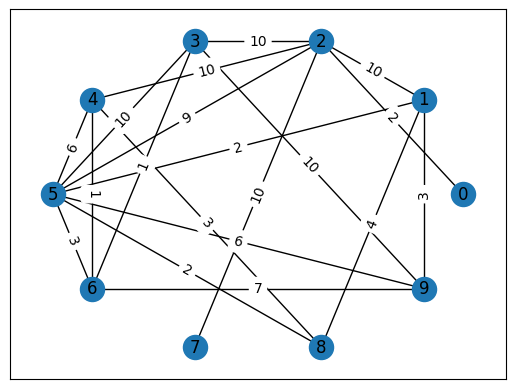

In [27]:
grafo = grafos.generate_random_connected_graph(10, 0.3)
grafos.draw_graph(grafo, nx.circular_layout) # usar apenas para pequenas quantidades de vértices (<100)

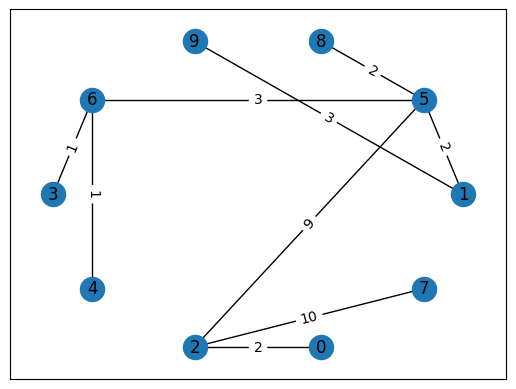

In [28]:
grafos.draw_graph(prim_base(grafo, 1), nx.circular_layout)

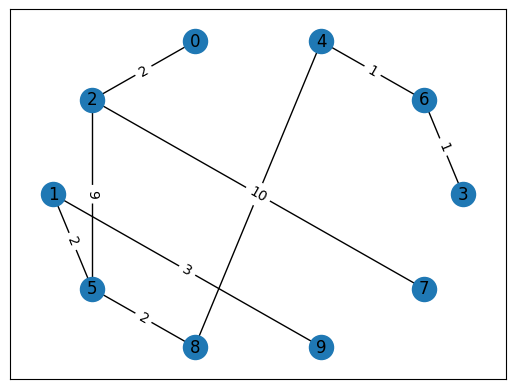

In [29]:
grafos.draw_graph(kruskal(grafo), nx.circular_layout)

### Comparando o tempo do Prim e do Kruskal
Geramos grafos com diferentes tamanho, e comparamos o tempo de execução dos dois algoritmos
para cada um desses grafos.

In [33]:
prim_time = []
prim_heap_time = []
kruskal_time = []

tamanhos = list(range(100, 501, 50))

for size in tamanhos:
    grafo = grafos.generate_random_connected_graph(size, 0.5)
    
    # Measuring Prim
    tic = time.perf_counter()
    prim_base(grafo, 1)
    toc = time.perf_counter()
    prim_time.append(toc - tic)
    
    # Measuring Prim with Heap
    tic = time.perf_counter()
    prim_with_heap(grafo, 1)
    toc = time.perf_counter()
    prim_heap_time.append(toc - tic)
    
    # Measuring Kruskal
    tic = time.perf_counter()
    kruskal(grafo)
    toc = time.perf_counter()
    kruskal_time.append(toc - tic)

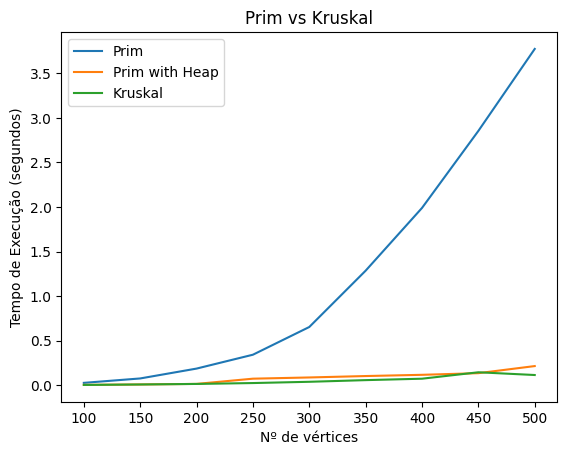

In [34]:
plt.title("Prim vs Kruskal")
plt.xticks(ticks=range(0, len(tamanhos)), labels=tamanhos)
plt.xlabel("Nº de vértices")
plt.ylabel("Tempo de Execução (segundos)")
plt.plot(prim_time, label="Prim")
plt.plot(prim_heap_time, label="Prim with Heap")
plt.plot(kruskal_time, label="Kruskal")
plt.legend()